In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
def Hcomplex(z):# computes the hue corresponding to the complex number z
    H = np.angle(z) / (2*np.pi) + 1
    return np.mod(H, 1)


In [202]:
def G(r,r_prime,phi, omega_0):
    dot =  np.einsum("ijk,i->jk",r, r_prime)
    if np.abs(np.exp(phi) - 1) < 1e-8:
        return 0.0
        # return np.exp((-np.square(np.linalg.norm(r)) - np.square(np.linalg.norm(r_prime, axis=0)) + 2*dot)/(omega_0*0.01))
    elif np.abs(np.exp(phi) + 1) < 1e-8:
        return 0.0
        # return np.exp((-np.square(np.linalg.norm(r)) - np.square(np.linalg.norm(r_prime, axis=0)) - 2*dot)/(omega_0*0.01))
    else:
        print(f"{phi=}")
        return np.exp(phi)/(2*np.pi*np.sinh(phi)) * np.exp(-(np.square(np.linalg.norm(r, axis=0)) + np.square(np.linalg.norm(r_prime, axis=0)))/(omega_0**2*np.tanh(phi)) + 2*dot/(omega_0**2*np.sinh(phi)))

def G_eta(r,r_prime,phi, omega_0, N, eta):
    sumOfG = np.zeros((r.shape[1],r.shape[2]), dtype=np.complex128)
    for s in range(N):
        sumOfG += np.exp(-2j*np.pi*s*eta/N)*G(r, r_prime, phi-2j*np.pi*s/N, omega_0)
    return sumOfG/N

def G_script(r, r_prime, omega_0, epsilon, kappa):
    return 0.0

phi=1.0471975511965976j


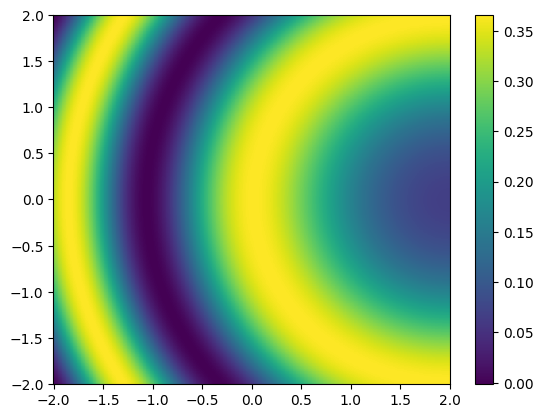

In [243]:
x = np.linspace(-2.0, 2.0, 500)
y = np.linspace(-2.0, 2.0, 500)
X,Y = np.meshgrid(x,y)
R = np.array([X,Y])

E = G(R, [1.0, 0.0], 1j*np.pi/3, 1.0)

plt.pcolor(X, Y, np.real(E - E[0,0]))
plt.colorbar()

phi=-0.8975979010256552j
phi=-1.7951958020513104j
phi=-2.6927937030769655j
phi=-3.5903916041026207j
phi=-4.487989505128276j
phi=-5.385587406153931j
phi=0.8975979010256552j
phi=-0.8975979010256552j
phi=-1.7951958020513104j
phi=-2.6927937030769655j
phi=-3.5903916041026207j
phi=-4.487989505128276j


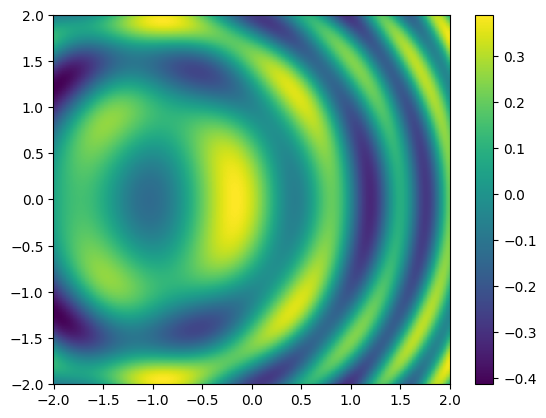

In [244]:
x = np.linspace(-2.0, 2.0, 500)
y = np.linspace(-2.0, 2.0, 500)
X,Y = np.meshgrid(x,y)
R = np.array([X,Y])

M = 2
N = 7
eta = 0

E = G_eta(R, [1.0, 0.0], -1j*M*np.pi/N, 1.0, N, eta) + G_eta(R, [1.0, 0.0], 1j*M*np.pi/N, 1.0, N, eta)
# E = G(R, [1.0,0.0], -1j*np.pi/2, 1.0)

plt.pcolor(X, Y, np.real(E))
plt.colorbar()
plt.show()

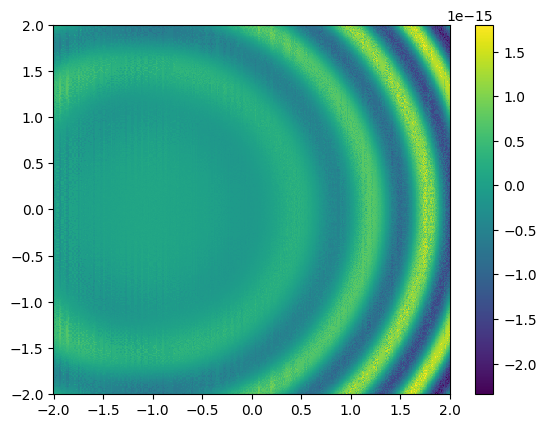

In [245]:
plt.pcolor(X, Y, np.imag(E))
plt.colorbar()

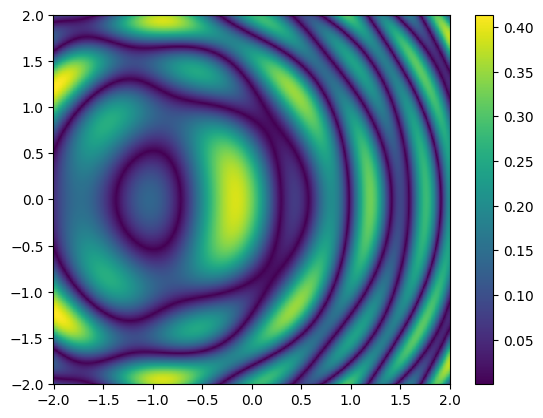

In [246]:
plt.pcolor(X, Y, np.abs(E))
plt.colorbar()